# 人脸识别
http://vis-www.cs.umass.edu/lfw/index.html
整个有10000张图片，5700个人，1700人有两张或以上的照片

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir(r'C:\Users\CDA')

In [2]:
lfw_people = fetch_lfw_people(data_home=r"C:\Users\CDA")

def fetch_lfw_people(data_home=None, funneled=True, resize=0.5,
                     min_faces_per_person=0, color=False,
                     slice_=(slice(70, 195), slice(78, 172)),
                     download_if_missing=True):
    """Loader for the Labeled Faces in the Wild (LFW) people dataset

    This dataset is a collection of JPEG pictures of famous people
    collected on the internet, all details are available on the
    official website:

        http://vis-www.cs.umass.edu/lfw/

    Each picture is centered on a single face. Each pixel of each channel
    (color in RGB) is encoded by a float in range 0.0 - 1.0.

    The task is called Face Recognition (or Identification): given the
    picture of a face, find the name of the person given a training set
    (gallery).

    The original images are 250 x 250 pixels, but the default slice and resize
    arguments reduce them to 62 x 74.

    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit learn data is stored in '~/scikit_learn_data' subfolders.

    funneled : boolean, optional, default: True
        Download and use the funneled variant of the dataset.

    resize : float, optional, default 0.5
        Ratio used to resize the each face picture.

    min_faces_per_person : int, optional, default None
        The extracted dataset will only retain pictures of people that have at
        least `min_faces_per_person` different pictures.

    color : boolean, optional, default False
        Keep the 3 RGB channels instead of averaging them to a single
        gray level channel. If color is True the shape of the data has
        one more dimension than the shape with color = False.

    slice_ : optional
        Provide a custom 2D slice (height, width) to extract the
        'interesting' part of the jpeg files and avoid use statistical
        correlation from the background

    download_if_missing : optional, True by default
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.

    Returns
    -------
    dataset : dict-like object with the following attributes:

    dataset.data : numpy array of shape (13233, 2914)
        Each row corresponds to a ravelled face image of original size 62 x 47
        pixels. Changing the ``slice_`` or resize parameters will change the
        shape of the output.

    dataset.images : numpy array of shape (13233, 62, 47)
        Each row is a face image corresponding to one of the 5749 people in
        the dataset. Changing the ``slice_`` or resize parameters will change
        the shape of the output.

    dataset.target : numpy array of shape (13233,)
        Labels associated to each face image. Those labels range from 0-5748
        and correspond to the person IDs.

    dataset.DESCR : string
        Description of the Labeled Faces in the Wild (LFW) dataset.
    """

In [13]:
lfw_people.data.shape#13233张图片，2914个特征

(13233, 2914)

In [3]:
n_samples, h, w = lfw_people.images.shape
print(n_samples)
print(h)#高的像素
print(w)#宽度像素

13233
62
47


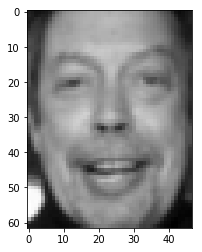

In [4]:
plt.imshow(lfw_people.images[0],cmap='gray')
plt.show()

In [9]:
lfw_people.target

array([5360, 3434, 3807, ..., 2175,  373, 2941], dtype=int64)

In [10]:
lfw_people.target_names[5360]

'Tim Curry'

In [5]:
n_classes = lfw_people.target_names.shape[0]#有多少个人
n_classes

5749

# 选择有多个图片的进行SVM训练

In [7]:
lfw_people = fetch_lfw_people(data_home=r'C:\Users\CDA',min_faces_per_person=50)

In [8]:
lfw_people.data.shape#1560张图片，2914个特征

(1560, 2914)

In [9]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [10]:
x_train,x_test,y_train,y_test = train_test_split(lfw_people.data, lfw_people.target)

In [15]:
# 'linear', 'poly', 'rbf', 'sigmoid'
model = svm.SVC(kernel='poly')
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7564102564102564

In [17]:
predictions = model.predict(x_test)

In [18]:
target_names=lfw_people.target_names

In [19]:
print(classification_report( y_test,predictions, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.79      0.56      0.65        27
     Colin Powell       0.75      0.81      0.78        48
  Donald Rumsfeld       0.64      0.77      0.70        30
    George W Bush       0.76      0.86      0.81       124
Gerhard Schroeder       0.76      0.73      0.75        30
      Hugo Chavez       0.92      0.63      0.75        19
   Jacques Chirac       0.70      0.78      0.74         9
    Jean Chretien       0.56      0.67      0.61        15
    John Ashcroft       1.00      0.67      0.80        15
Junichiro Koizumi       0.83      0.91      0.87        11
  Serena Williams       0.67      0.50      0.57        16
       Tony Blair       0.82      0.70      0.75        46

         accuracy                           0.76       390
        macro avg       0.77      0.71      0.73       390
     weighted avg       0.77      0.76      0.75       390



In [21]:
n_classes = lfw_people.target_names.shape[0]
print(confusion_matrix(y_test,predictions,labels= range(n_classes)))

[[ 11   2   2   0   0   0   0   0   0   0   0   1]
 [  0  53   1   2   1   1   1   1   0   0   0   3]
 [  2   2  24   5   1   0   1   3   0   0   0   1]
 [  2   2   3 119   3   1   2   0   5   3   0   4]
 [  0   0   0   1  21   0   0   1   0   0   0   1]
 [  0   0   0   0   0  12   1   0   0   2   0   0]
 [  0   1   0   0   0   1   6   0   0   0   0   0]
 [  0   0   1   0   0   0   0   9   0   0   0   0]
 [  0   1   0   0   2   0   0   0   5   1   0   0]
 [  0   0   0   0   1   0   0   0   0  14   0   0]
 [  2   0   0   0   0   1   0   0   0   0  20   0]
 [  0   2   0   1   1   0   0   0   1   0   0  19]]


# PCA降维
PCA主要用于数据降维，对于一系列例子的特征组成的多维向量，多维向量里的某些元素本身没有区分性，比如某个元素在所有的例子中都为1，或者与1差距不大，那么这个元素本身就没有区分性，用它做特征来区分，贡献会非常小。所以我们的目的是找那些变化大的元素，即方差大的那些维，而去除掉那些变化不大的维，从而使特征留下的都是精品，而且计算量也变小了。
https://www.cnblogs.com/pinard/p/6243025.html

SVD:https://www.cnblogs.com/pinard/p/6251584.html
PCA：https://blog.csdn.net/hellocsz/article/details/80726584
LDA：https://blog.csdn.net/hohaizx/article/details/78165786

In [20]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=100).fit(x_train)

In [21]:
x_train.shape

(1170, 2914)

In [24]:
pca.components_

array([[-0.0045899 , -0.00541668, -0.00672041, ..., -0.00964028,
        -0.00806065, -0.0071709 ],
       [ 0.01659267,  0.01592535,  0.01614604, ..., -0.03765808,
        -0.03731309, -0.03560174],
       [-0.02872044, -0.02809539, -0.02737293, ..., -0.03367559,
        -0.02898967, -0.02583286],
       ...,
       [-0.07251991, -0.04842054, -0.00583714, ...,  0.0002821 ,
         0.02959894,  0.04086787],
       [-0.01377684, -0.00250602,  0.01639899, ..., -0.00207952,
         0.02902768,  0.03763745],
       [-0.0218395 , -0.01559862,  0.00411305, ...,  0.02917596,
        -0.01550425, -0.03296057]], dtype=float32)

In [75]:
eigenfaces = pca.components_.reshape((n_components, h, w))#特征脸

In [76]:
eigenfaces.shape

(100, 62, 47)

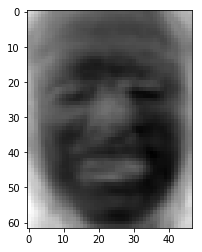

In [77]:
#画特征脸
plt.imshow(eigenfaces[0], cmap=plt.cm.gray)

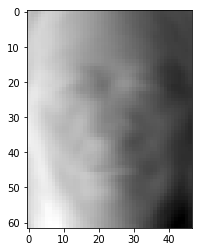

In [78]:
plt.imshow(eigenfaces[1], cmap=plt.cm.gray)

In [26]:
# 特征提取
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [80]:
x_train_pca.shape

(1170, 100)

In [81]:
x_test_pca.shape

(390, 100)

In [27]:
# 'linear', 'poly', 'rbf', 'sigmoid'
model = svm.SVC(kernel='poly')
model.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [83]:
model.score(x_test_pca,y_test)

0.6666666666666666

In [84]:
predictions = model.predict(x_test_pca)
print(classification_report(predictions, y_test, target_names=target_names))
print(confusion_matrix(predictions, y_test, labels= range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.56      0.55        16
     Colin Powell       0.83      0.66      0.73        79
  Donald Rumsfeld       0.61      0.61      0.61        31
    George W Bush       0.85      0.76      0.80       144
Gerhard Schroeder       0.17      0.56      0.26         9
      Hugo Chavez       0.50      0.53      0.52        15
   Jacques Chirac       0.36      1.00      0.53         4
    Jean Chretien       0.57      0.80      0.67        10
    John Ashcroft       0.18      0.15      0.17        13
Junichiro Koizumi       0.65      0.87      0.74        15
  Serena Williams       0.80      0.94      0.86        17
       Tony Blair       0.52      0.41      0.45        37

        micro avg       0.67      0.67      0.67       390
        macro avg       0.55      0.65      0.57       390
     weighted avg       0.71      0.67      0.68       390

[[  9   2   2   1   0   0   0   0   0   0   1   1]
 [

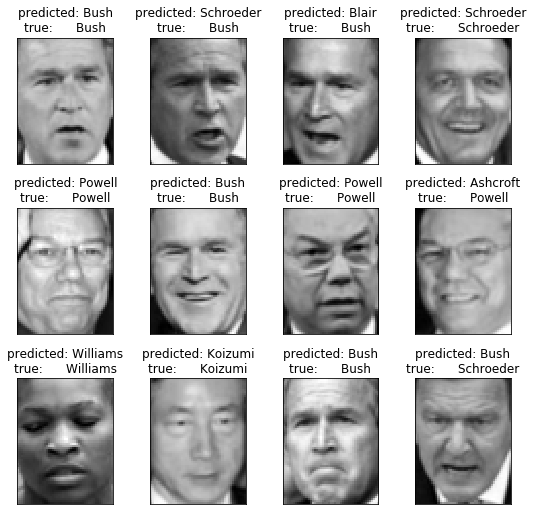

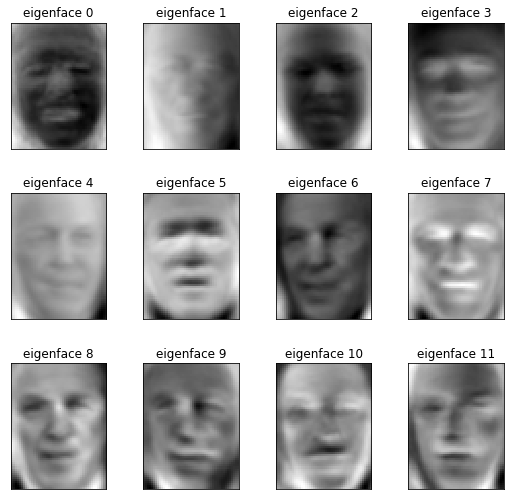

In [85]:
# 画图，3行4列
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# 获取一张图片title
def title(predictions, y_test, target_names, i):
    pred_name = target_names[predictions[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

# 获取所有图片title
prediction_titles = [title(predictions, y_test, target_names, i) for i in range(predictions.shape[0])]

# 画图
plot_gallery(x_test, prediction_titles, h, w)

# 设置特征脸的title
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

# 画特征脸的图
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [86]:
eigenfaces.shape[0]

100

# pipeline和GridSearchCV优化参数

In [87]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(kernel='poly', class_weight='balanced')
model = make_pipeline(pca, svc)

#为了测试分类器的训练效果，将数据集分解成训练集和测试集进行交叉检验
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=42)

#用网络搜索交叉检验来寻找最优参数组合。通过不断调整C（松弛变量）和参数gamma（控制径向基函数核的大小），确定最优模型
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(x_train, y_train)
print(grid.best_params_)
model = grid.best_estimator_
y_fit = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit, target_names=lfw_people.target_names))

D:\conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\conda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svc__C': 50, 'svc__gamma': 0.005}
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.12      0.22        16
     Colin Powell       0.97      0.47      0.63        66
  Donald Rumsfeld       0.50      0.07      0.13        27
    George W Bush       0.42      0.97      0.59       140
Gerhard Schroeder       0.75      0.12      0.21        24
      Hugo Chavez       1.00      0.06      0.11        17
   Jacques Chirac       0.50      0.10      0.17        10
    Jean Chretien       0.50      0.07      0.12        14
    John Ashcroft       0.67      0.12      0.21        16
Junichiro Koizumi       1.00      0.55      0.71        11
  Serena Williams       1.00      0.11      0.20         9
       Tony Blair       0.91      0.25      0.39        40

        micro avg       0.50      0.50      0.50       390
        macro avg       0.77      0.25      0.31       390
     weighted avg       0.68      0.50      0.44       390



In [38]:
#rbf核
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

#为了测试分类器的训练效果，将数据集分解成训练集和测试集进行交叉检验
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=42)

#用网络搜索交叉检验来寻找最优参数组合。通过不断调整C（松弛变量）和参数gamma（控制径向基函数核的大小），确定最优模型
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(x_train, y_train)
print(grid.best_params_)
model = grid.best_estimator_
y_fit = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit, target_names=lfw_people.target_names))

D:\conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\conda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svc__C': 1, 'svc__gamma': 0.005}
                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.88      0.70        16
     Colin Powell       0.86      0.91      0.88        66
  Donald Rumsfeld       0.66      0.78      0.71        27
    George W Bush       0.96      0.78      0.86       140
Gerhard Schroeder       0.81      0.88      0.84        24
      Hugo Chavez       0.81      0.76      0.79        17
   Jacques Chirac       0.82      0.90      0.86        10
    Jean Chretien       0.92      0.79      0.85        14
    John Ashcroft       0.70      0.88      0.78        16
Junichiro Koizumi       1.00      0.82      0.90        11
  Serena Williams       0.67      0.89      0.76         9
       Tony Blair       0.78      0.88      0.82        40

        micro avg       0.83      0.83      0.83       390
        macro avg       0.80      0.84      0.81       390
     weighted avg       0.85      0.83      0.83       390

